***All planets in the solar system orbit around the Sun. These planets are non-exoplanets. According to NASA, exoplanet is any planet beyond our solar system that mostly orbit other stars.***

Reference: https://exoplanets.nasa.gov/what-is-an-exoplanet/overview/

In this notebook, we shall explore the behaviour of exoplanet and non-exoplanet stars 🌟

***Importing data***

In [7]:
import numpy as np 
import pandas as pd 

exoTrain = pd.read_csv("exoTrain.csv")
print(exoTrain.head(5))

   LABEL   FLUX.1   FLUX.2   FLUX.3   FLUX.4   FLUX.5   FLUX.6  FLUX.7  \
0      2    93.85    83.81    20.10   -26.98   -39.56  -124.71 -135.18   
1      2   -38.88   -33.83   -58.54   -40.09   -79.31   -72.81  -86.55   
2      2   532.64   535.92   513.73   496.92   456.45   466.00  464.50   
3      2   326.52   347.39   302.35   298.13   317.74   312.70  322.33   
4      2 -1107.21 -1112.59 -1118.95 -1095.10 -1057.55 -1034.48 -998.34   

    FLUX.8  FLUX.9  ...  FLUX.3188  FLUX.3189  FLUX.3190  FLUX.3191  \
0   -96.27  -79.89  ...     -78.07    -102.15    -102.15      25.13   
1   -85.33  -83.97  ...      -3.28     -32.21     -32.21     -24.89   
2   486.39  436.56  ...     -71.69      13.31      13.31     -29.89   
3   311.31  312.42  ...       5.71      -3.73      -3.73      30.05   
4 -1022.71 -989.57  ...    -594.37    -401.66    -401.66    -357.24   

   FLUX.3192  FLUX.3193  FLUX.3194  FLUX.3195  FLUX.3196  FLUX.3197  
0      48.57      92.54      39.32      61.42       5.08  

In [8]:
exoTrain.shape

(5087, 3198)

***Data Wrangling***

*Creating an index column for all stars*

In [9]:
exoTrain['id'] = range(1, len(exoTrain) + 1)
exoTrain['id'] = exoTrain['id'].astype('int')
exoTrain['id'].head()

0    1
1    2
2    3
3    4
4    5
Name: id, dtype: int64

*Changing labels of exoplanets and non-exoplanet stars*

Each star has a binary label of 2 or 1. 

2 indicated that that the star is confirmed to have at least one exoplanet in orbit.

LABEL -> 2 is an exoplanet star and 1 is a non-exoplanet-star.

In [10]:
exoTrain["LABEL"] = exoTrain["LABEL"].replace(1, 0)
exoTrain["LABEL"] = exoTrain["LABEL"].replace(2, 1)

After this step, 

LABEL -> 1 is an exoplanet star and 0 is a non-exoplanet-star. 

This is more intuitive.


*Distinct column values in exoTrain["LABEL"]*

In [11]:
exoTrain["LABEL"].unique()

array([1, 0])

Here's preview of the clean dataset:

In [12]:
print(exoTrain.head(5))

   LABEL   FLUX.1   FLUX.2   FLUX.3   FLUX.4   FLUX.5   FLUX.6  FLUX.7  \
0      1    93.85    83.81    20.10   -26.98   -39.56  -124.71 -135.18   
1      1   -38.88   -33.83   -58.54   -40.09   -79.31   -72.81  -86.55   
2      1   532.64   535.92   513.73   496.92   456.45   466.00  464.50   
3      1   326.52   347.39   302.35   298.13   317.74   312.70  322.33   
4      1 -1107.21 -1112.59 -1118.95 -1095.10 -1057.55 -1034.48 -998.34   

    FLUX.8  FLUX.9  ...  FLUX.3189  FLUX.3190  FLUX.3191  FLUX.3192  \
0   -96.27  -79.89  ...    -102.15    -102.15      25.13      48.57   
1   -85.33  -83.97  ...     -32.21     -32.21     -24.89      -4.86   
2   486.39  436.56  ...      13.31      13.31     -29.89     -20.88   
3   311.31  312.42  ...      -3.73      -3.73      30.05      20.03   
4 -1022.71 -989.57  ...    -401.66    -401.66    -357.24    -443.76   

   FLUX.3193  FLUX.3194  FLUX.3195  FLUX.3196  FLUX.3197  id  
0      92.54      39.32      61.42       5.08     -39.54   1  
1 

***Let's create light curves!***

Light curves are created by measuring the change in observed flux of stars over time.

In [34]:
exo = exoTrain.loc[exoTrain['LABEL'] == 1]
#exo["LABEL"].unique() -> checking!

import random as rd
rd.seed(100)
rd_exo = exo.sample()
print(rd_exo)
print(rd_exo["id"])

    LABEL  FLUX.1  FLUX.2  FLUX.3  FLUX.4  FLUX.5  FLUX.6  FLUX.7  FLUX.8  \
29      1   31.29   25.14   36.93   16.63   17.01    -7.5    0.09    1.24   

    FLUX.9  ...  FLUX.3189  FLUX.3190  FLUX.3191  FLUX.3192  FLUX.3193  \
29  -19.82  ...      12.96       28.5      51.05      25.85       4.79   

    FLUX.3194  FLUX.3195  FLUX.3196  FLUX.3197  id  
29      13.26     -17.58      13.79       0.72  30  

[1 rows x 3199 columns]
29    30
Name: id, dtype: int64


In [35]:
rd_exo_flux = rd_exo.iloc[:, 1:3198]
print(rd_exo_flux)

    FLUX.1  FLUX.2  FLUX.3  FLUX.4  FLUX.5  FLUX.6  FLUX.7  FLUX.8  FLUX.9  \
29   31.29   25.14   36.93   16.63   17.01    -7.5    0.09    1.24  -19.82   

    FLUX.10  ...  FLUX.3188  FLUX.3189  FLUX.3190  FLUX.3191  FLUX.3192  \
29    -24.0  ...      11.36      12.96       28.5      51.05      25.85   

    FLUX.3193  FLUX.3194  FLUX.3195  FLUX.3196  FLUX.3197  
29       4.79      13.26     -17.58      13.79       0.72  

[1 rows x 3197 columns]


In [36]:
type(rd_exo_flux)

pandas.core.frame.DataFrame

In [37]:
rd_exo_flux_list = rd_exo_flux.values.tolist()
rd_exo_flux_list
len(rd_exo_flux_list)

1

rd_exo_flux_list is a nested list of length 1. So, we extract our data points for plotting as such:

In [38]:
rd_exo_flux_list[0]
len(rd_exo_flux_list[0]) 

3197

In [39]:
rd_exo_flux_plot_points = rd_exo_flux_list[0]
type(rd_exo_flux_plot_points)

list

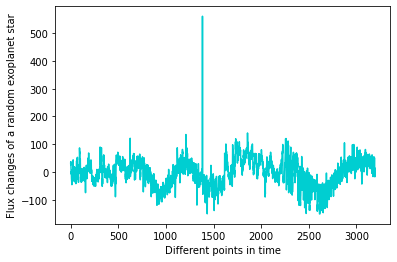

In [40]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(rd_exo_flux_plot_points, color = 'darkturquoise')
plt.xlabel("Different points in time")
plt.ylabel("Flux changes of a random exoplanet star")
plt.show()

We could repeat the same steps of creating static light curves to visualize non-exoplanet stars but aesthetically-pleasing interactive plots are a lot cooler 🤔

We can create interactive time-series plots to depict our light curves using **Plotly**.

In [32]:
import plotly.graph_objects as px
import numpy as np

exo_df = exoTrain.loc[exoTrain['LABEL'] == 1]
exo_df['star_id'] = range(1, len(exo_df) + 1)
exo_df['star_id'] = exo_df['star_id'].astype('str')
new_exo_df = exo_df.iloc[:, 1:3197]

plot = px.Figure(data=[px.Scatter(
	x=new_exo_df.columns,
	y=new_exo_df.iloc[0,:], #the row value can be varied from 0 to 36 to plot exoplanet stars
	line=dict(color="darkturquoise"),
	mode='lines',)
])

plot.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [33]:
import plotly.graph_objects as px
import numpy as np

non_exo_df = exoTrain.loc[exoTrain['LABEL'] == 0]
non_exo_df['star_id'] = range(1, len(non_exo_df) + 1)
non_exo_df['star_id'] = non_exo_df['star_id'].astype('str')
new_non_exo_df = non_exo_df.iloc[:, 1:3197]

plot = px.Figure(data=[px.Scatter(
	x=new_non_exo_df.columns,
	y=new_non_exo_df.iloc[0,:], #the row value can be varied from 0 to 5049 to plot non-exoplanet stars
	line=dict(color="red"),
	mode='lines',)
])

plot.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



***How can we use these plots to detect exoplanets?***

Many exoplanets are often detected by the effect they have on the light emitted by their host stars. 

This is known as the **transit method** which occurs when the planet passes between a star and its observer causing a dip in brightness on the light curve.

If we plot the recorded brightness of stars over time and find periodic dips in the plots, the presence of an exoplanet can be inferred from this observation. 

Reference: https://exoplanets.nasa.gov/faq/31/whats-a-transit/

***Inferences***

Upon observing light curves of various randomly selected exoplanet and non-exoplanet stars, we see periodic dips in flux in both cases. 

However, the light curves of exoplanet stars depict more dramatic dips that extend for a longer period of time *(a possible cause of this could be because exoplanet stars are further from the observer at Earth so it takes longer for the planet to pass the star and let it shine bright again)* before increasing in brightness. The light curves of non-exoplanet stars seem to have more abrupt dips. The light curves seem to look like sine curves.

These are merely observations detected by human eye after looking at a handful out of many light curves 👀

To avoid making any hasty generalisations on the characteristics of exoplanet stars, let's do more digging! 🔭